# Travel Package Purchase Prediction

## Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

The company in the last campaign contacted the customers at random without looking at the available information. However, this time company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being, and wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer
* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Loading libraries

In [84]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

#libraries to help with model building
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV

## Import Dataset

In [4]:
# converting data from xlsx file to csv
data_xls = pd.read_excel('Tourism.xlsx', 'Tourism', index_col=None)
data_xls.to_csv('Tourism.csv', encoding='utf-8', index=False)

In [5]:
d = pd.read_csv("Tourism.csv")
# copying data to another variable to avoid any changes to original data
data = d.copy()

### View the first and last 5 rows of the dataset.

In [6]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### Understand the shape of the dataset.

In [8]:
data.shape

(4888, 20)

* This dataset has 4888 rows and 20 columns.

### Check the data types of the columns for the dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [10]:
## Converting the data type of categorical features to 'category'
cat_cols = ['ProdTaken','TypeofContact', 'CityTier', 'Occupation', 'Gender', 'PreferredPropertyStar', 'MaritalStatus', 'Passport',
           'OwnCar', 'Designation', 'PitchSatisfactionScore', 'ProductPitched']
data[cat_cols] = data[cat_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   category
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

### Summary of the dataset.

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.00,22347.0,25571.00,98678.0


* CustomerID does not add any value to our analysis since it's just used for identification, therefore I'll drop this column for model prediction.
* The average age for customers is 37 years and there's a wide range in ages, from 18 to 61 years old.
* *I'm making the assupmtion DurationOfPitch is in minutes.* The average length of a pitch is 15 minutes, but there's a wide range from 5 min. to 127 min. There is a large difference in the 75th percentile and the max value, indicating there might be outliers. 
* NumberOfPersonVisting shows that 75% of customers have 3 or less people visiting.
* NumberOfFollowups ranges from 1 to 6 with an average of about 3 follow ups.
* NumberOfTrips ranges from 1 to 22 with an average of about 3 taken per year. There is again a large difference in the 75th percentile and the max value, indicating there might be outliers. 
* NumberOfChildrenVisiting is both an average and a minimum of 1 with 3 children being the max.
* MonthlyIncome on average is 23,619 dollars and there's a wide range. Like seen earlier, the difference in the 75th percentile and the max value is vvery large, indicating there might be outliers. 

In [12]:
data = data.drop(['CustomerID'], axis=1)

In [13]:
data.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862,3,3,2993
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
PitchSatisfactionScore,4888,5,3,1478


In [14]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in PreferredPropertyStar are :
3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64
**************************************************
Unique values in

* More customers chose not to purchase a package.
* Minority of customers were company invited.
* Majority of the customers are of the highest ranking CityTier.
* Most customers are salaried or small business workers.
* There seems to be a typo with Gender that I need to fix, 'Fe male' -> 'Female'.
* PreferredPropertyStar of most people is 3, implying they're not interested in a luxury experience and more interested in cost saving options.
* The majority of customers are married.

In [31]:
data["Gender"].replace({"Fe Male": "Female"}, inplace=True)

In [35]:
data["Gender"] = data["Gender"].astype('category')
data.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862,3,3,2993
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
PitchSatisfactionScore,4888,5,3,1478


## EDA

## Univariate analysis

In [15]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Age

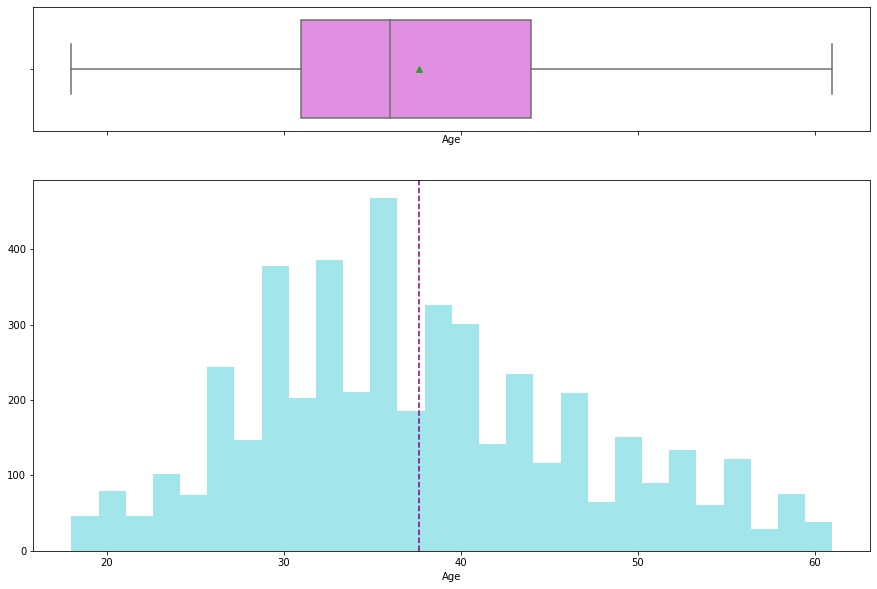

In [16]:
histogram_boxplot(data['Age'])

* Data is ever so slightly skewed to the right for age.

### Observations on DurationOfPitch

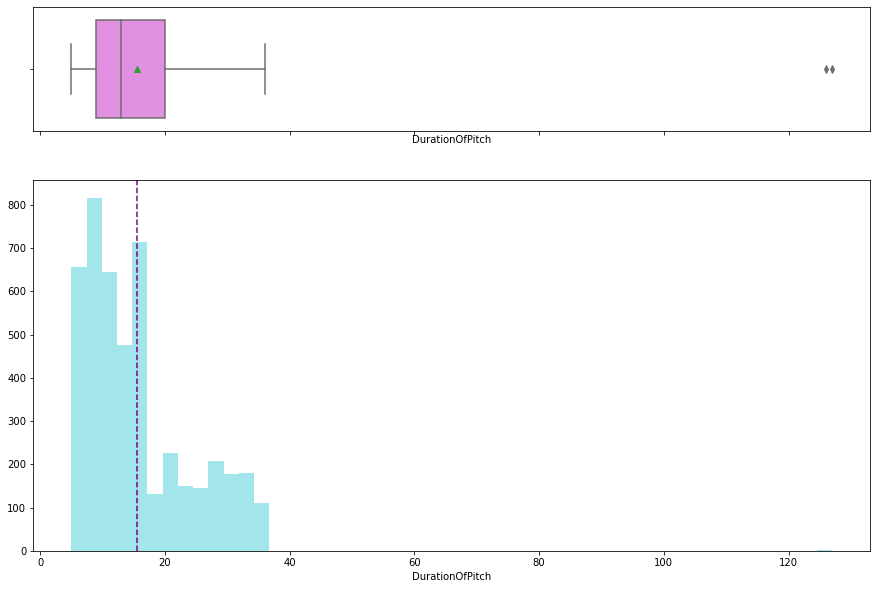

In [17]:
histogram_boxplot(data['DurationOfPitch'])

* The data is skewed to the right and there are a few outliers.

### Observations on NumberOfPersonVisiting

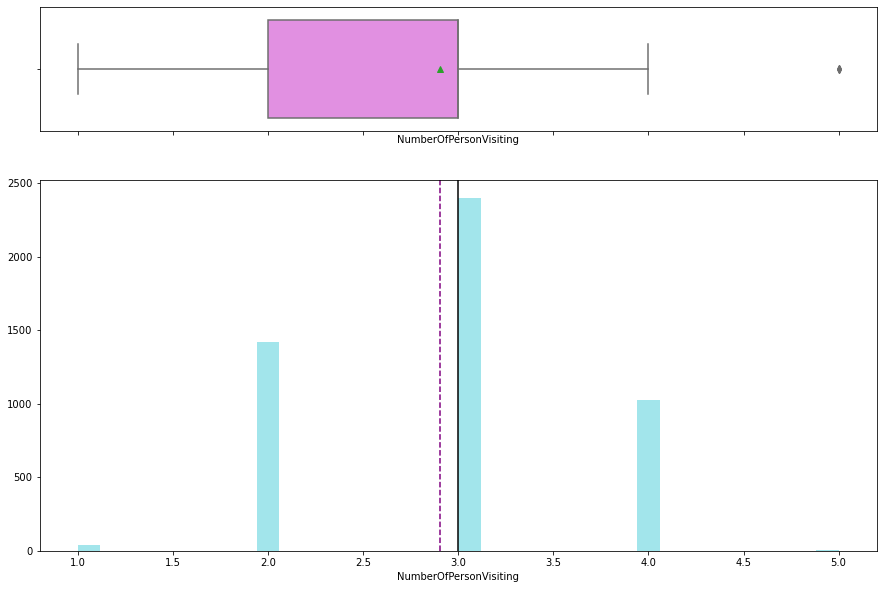

In [18]:
histogram_boxplot(data['NumberOfPersonVisiting'])

* Most customers have 3 people visiting.

### Observations on NumberOfFollowups

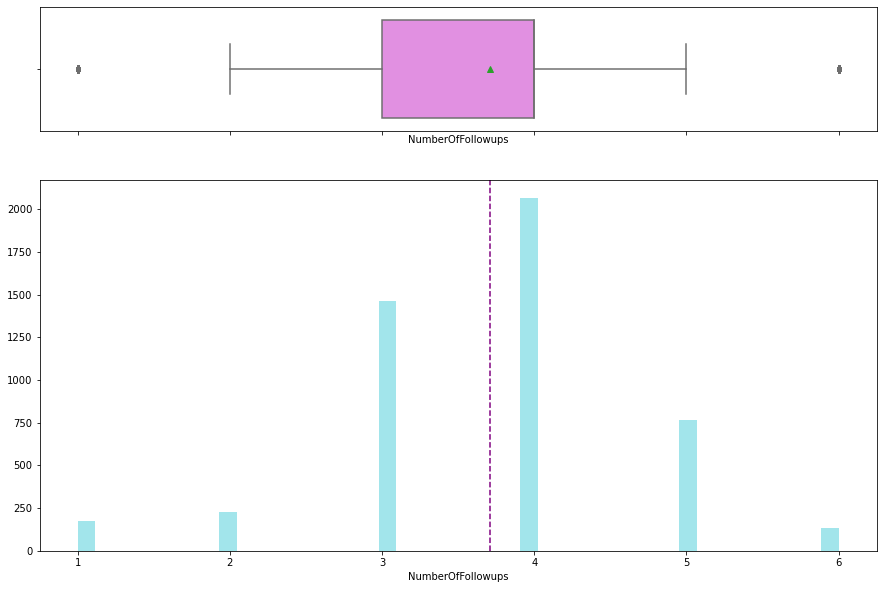

In [19]:
histogram_boxplot(data['NumberOfFollowups'])

* Average number of follow ups is between 3 and 4.

### Observations on NumberOfTrips

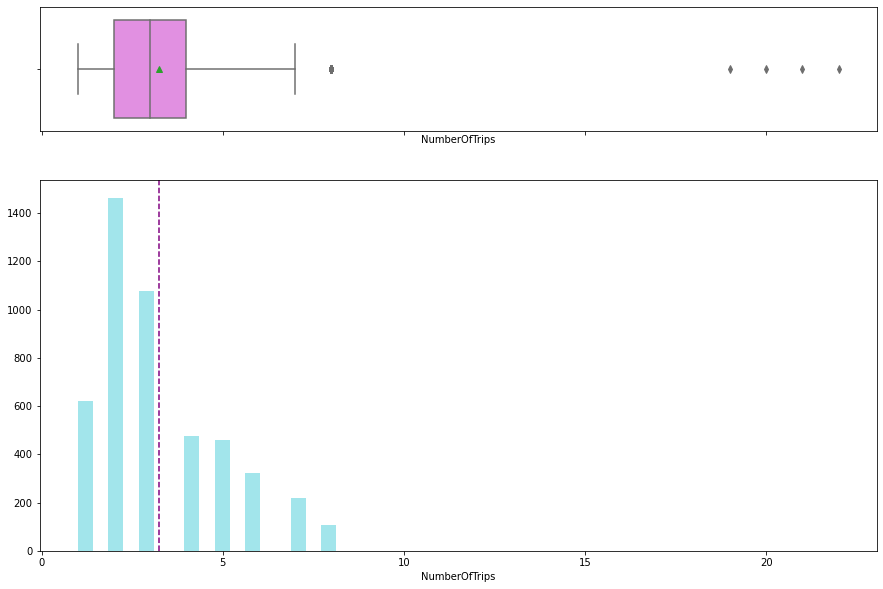

In [20]:
histogram_boxplot(data['NumberOfTrips'])

* The data is right-skewed and there are outliers.

### Observations on NumberOfChildrenVisiting

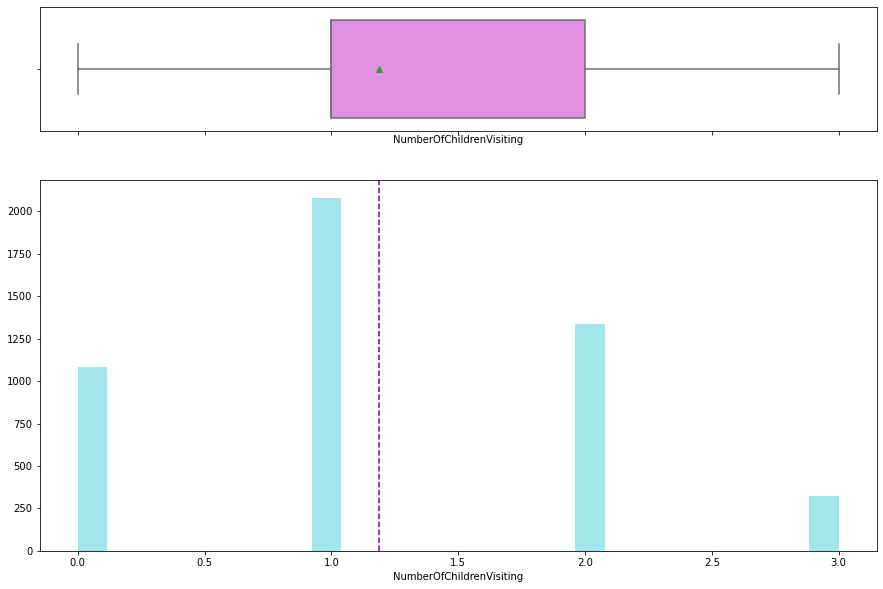

In [21]:
histogram_boxplot(data['NumberOfChildrenVisiting'])

* Customers going either don't have kids or don't take their kids with them when vactioning.

### Observations on  MonthlyIncome

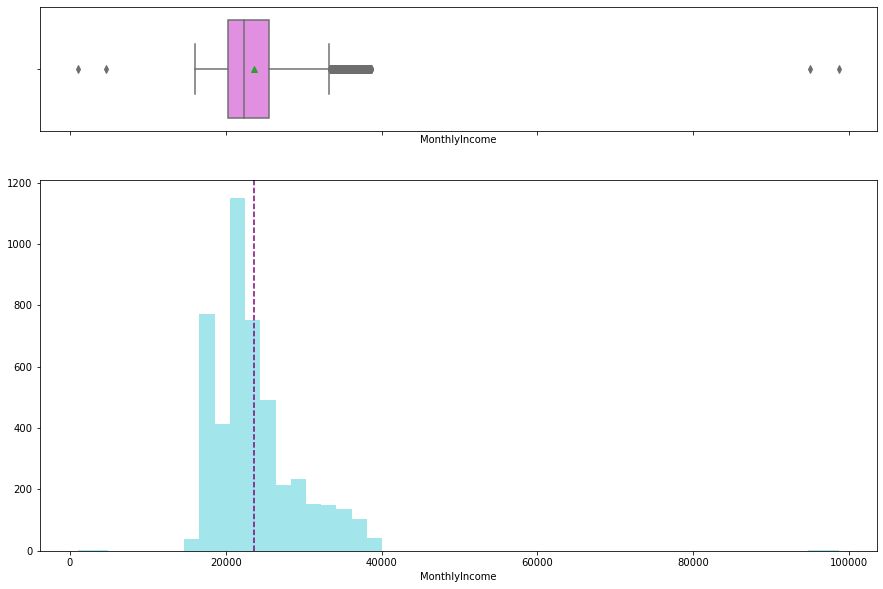

In [22]:
histogram_boxplot(data['MonthlyIncome'])

* There are outliers on both the lower and higher income range for the data.

In [23]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on ProdTaken

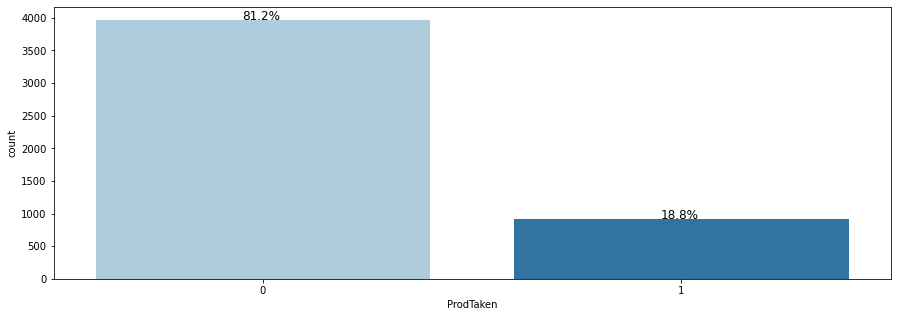

In [24]:
perc_on_bar('ProdTaken')

* 81% of customers do not purchase a package.

### Observations on TypeofContact

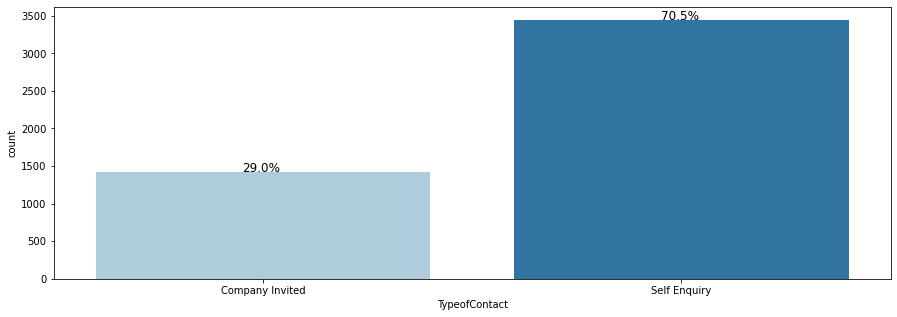

In [27]:
perc_on_bar('TypeofContact')

* 70% of customers are customers by their own means, they weren't company invited.

### Observations on CityTier

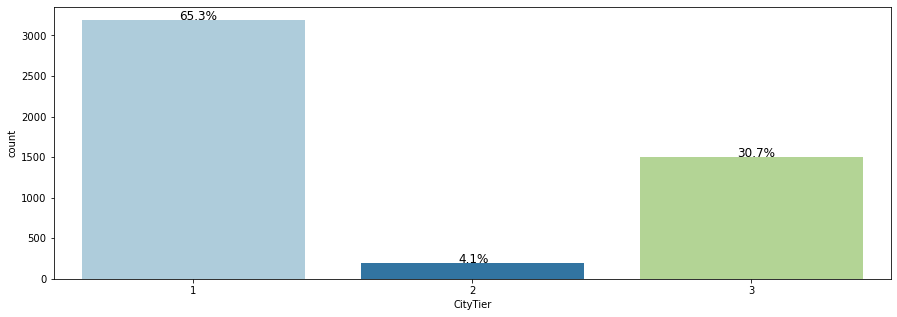

In [28]:
perc_on_bar('CityTier')

* 65% of customers are fro CityTier 1, which is the highest, followed by 30% in tier 3.

### Observations on Occupation

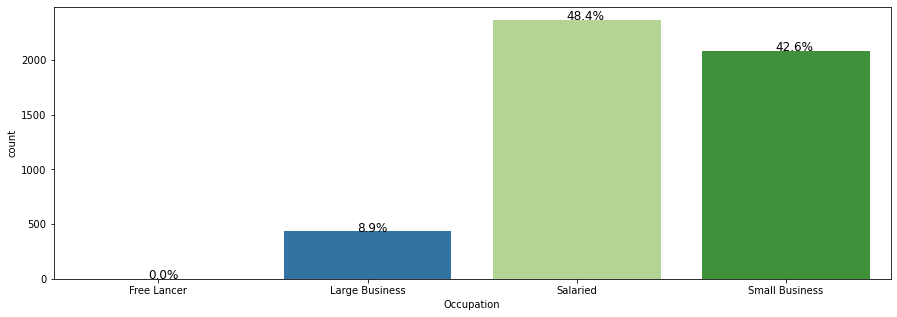

In [29]:
perc_on_bar('Occupation')

* 48% of customers are salaried workers.
* In close second are customers who work for small businesses (42%).

### Observations on Gender

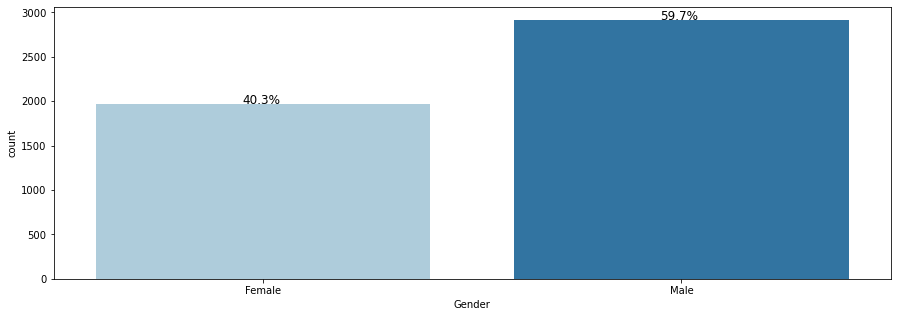

In [36]:
perc_on_bar('Gender')

* 59% of customers are male.

### Observations on ProductPitched

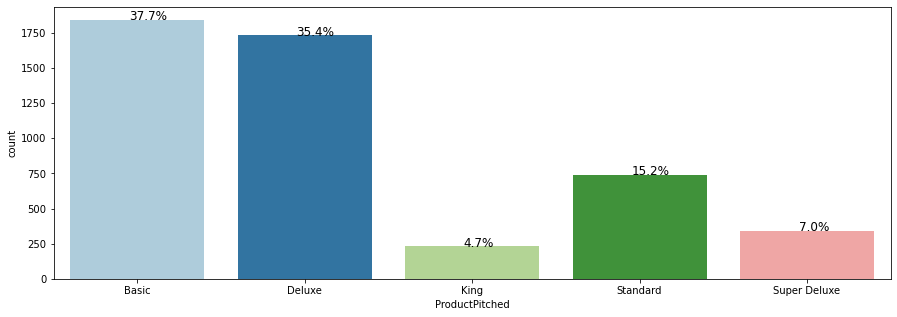

In [37]:
perc_on_bar('ProductPitched')

* Basic is the product pitched the most at 37%.
* Deluxe is not far behind at 35%.
* The three lowest packages are the ones pitched the most.

### Observations on PreferredPropertyStar

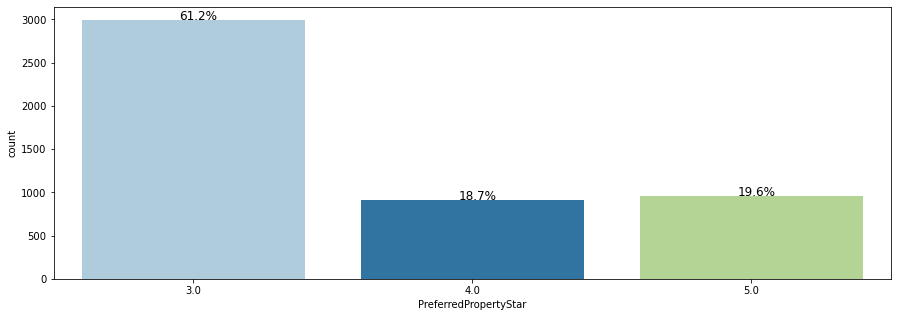

In [38]:
perc_on_bar('PreferredPropertyStar')

* Most people prefer 3-star hotels vs fancier ones.

### Observations on MaritalStatus

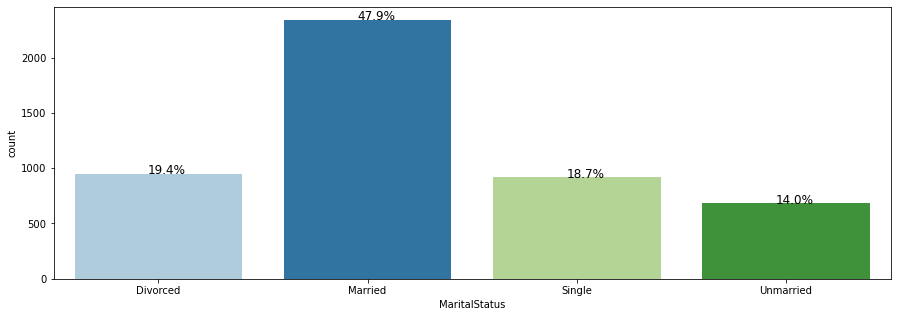

In [39]:
perc_on_bar('MaritalStatus')

* 47% of customers are married.

### Observations on Passport

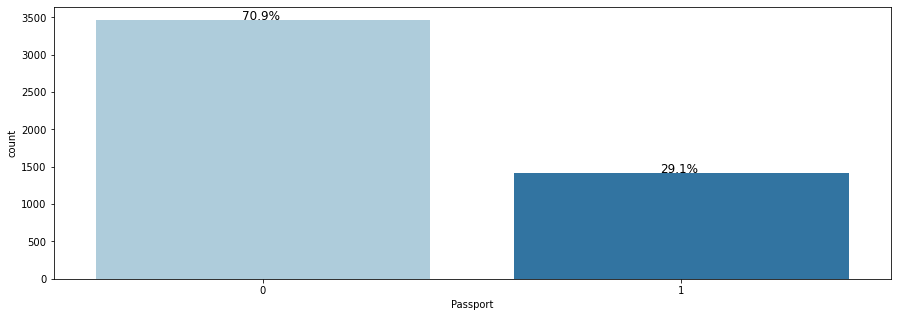

In [40]:
perc_on_bar('Passport')

* The majority of customers don't have a passport which is very interesting considering they're interested in traveling.

### Observations on PitchSatisfactionScore

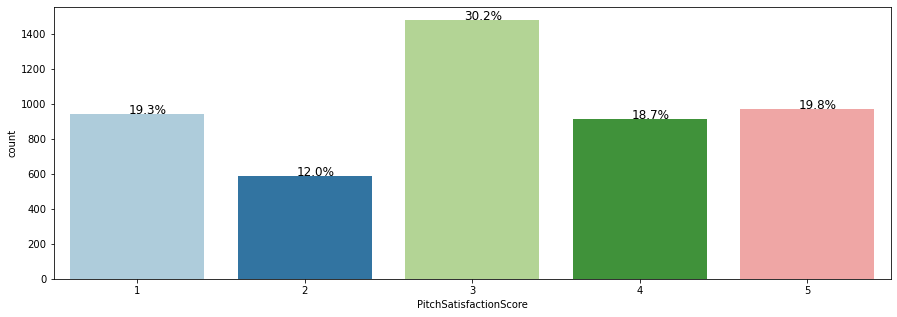

In [41]:
perc_on_bar('PitchSatisfactionScore')

* 30% of pitch satisfaction scores are 3.
* Both 1 and 5 scores are at 19%.

### Observations on OwnCar

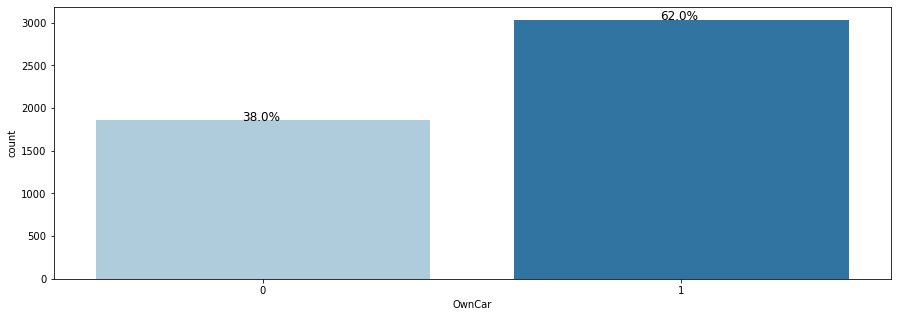

In [42]:
perc_on_bar('OwnCar')

* Most customers own a car.

### Observations on Designation

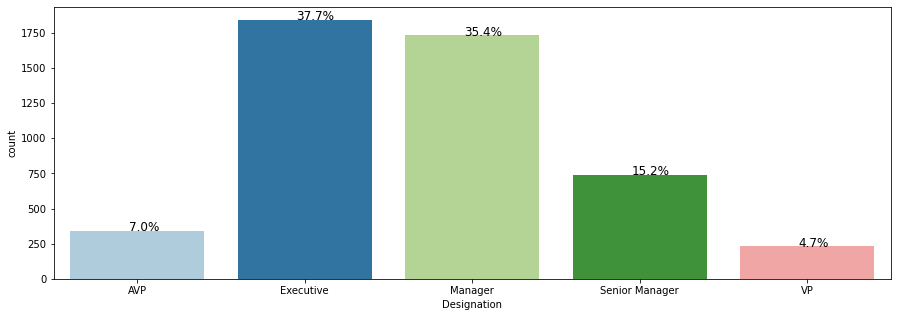

In [43]:
perc_on_bar('Designation')

* Majority of customers are executives (37%) or managers (35%).

## Bivariate Analysis

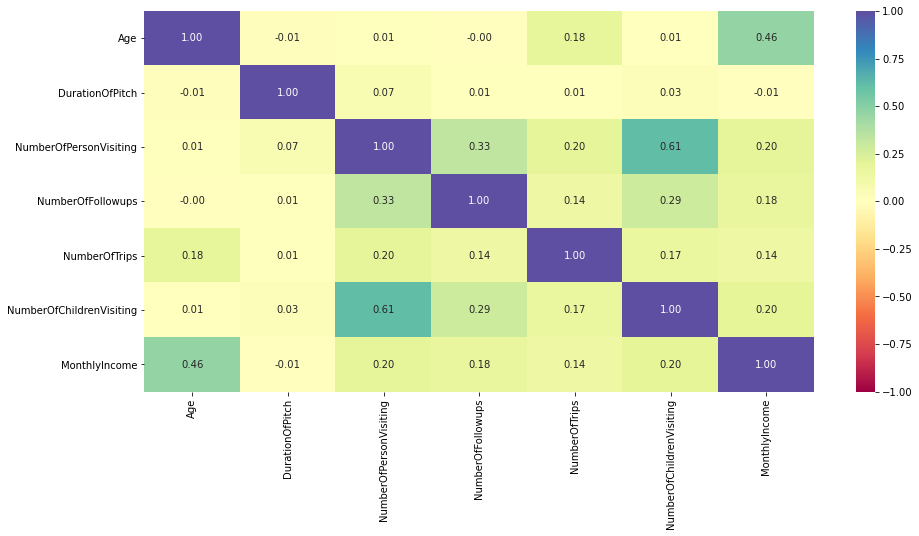

In [46]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

* NumberOfChildrenVisiting and NumberOfPersonVisting are pretty strongly correlated which makes sense, they are very relevant to each other.
* None of these variables are strongly negatively correlated.
* Age and MonthlyIncome are positively related as they usually are.

In [47]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['ProdTaken'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['ProdTaken'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### ProdTaken vs TypeofContact

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


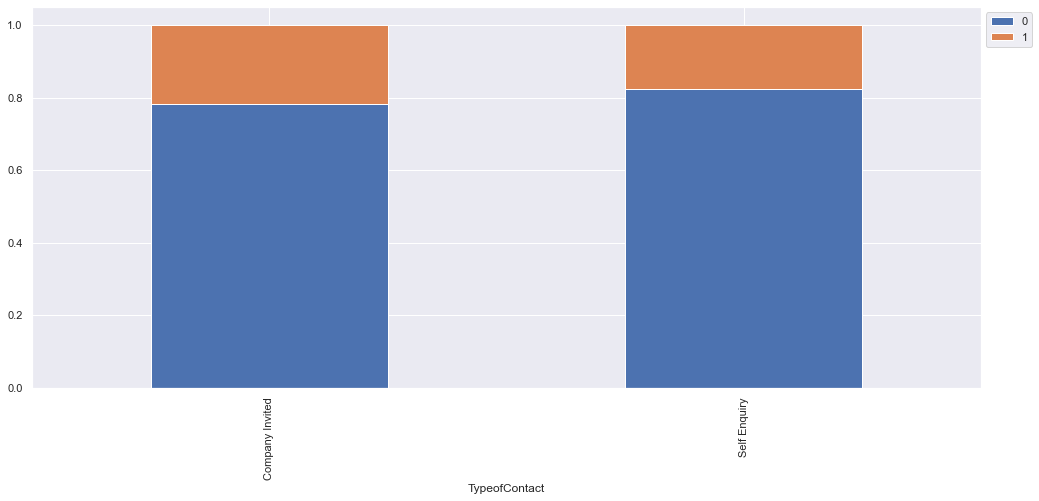

In [49]:
stacked_plot(data['TypeofContact'])

### ProdTaken vs CityTier

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


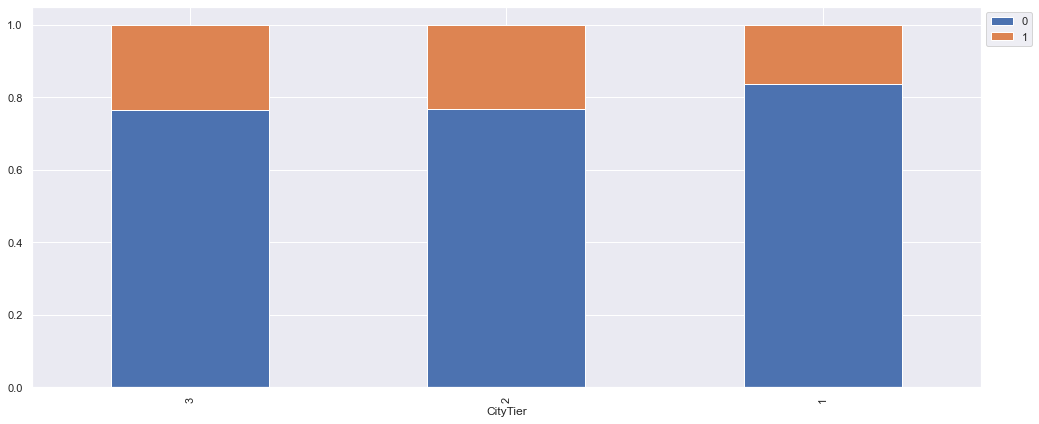

In [50]:
stacked_plot(data['CityTier'])

### ProdTaken vs Occupation

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


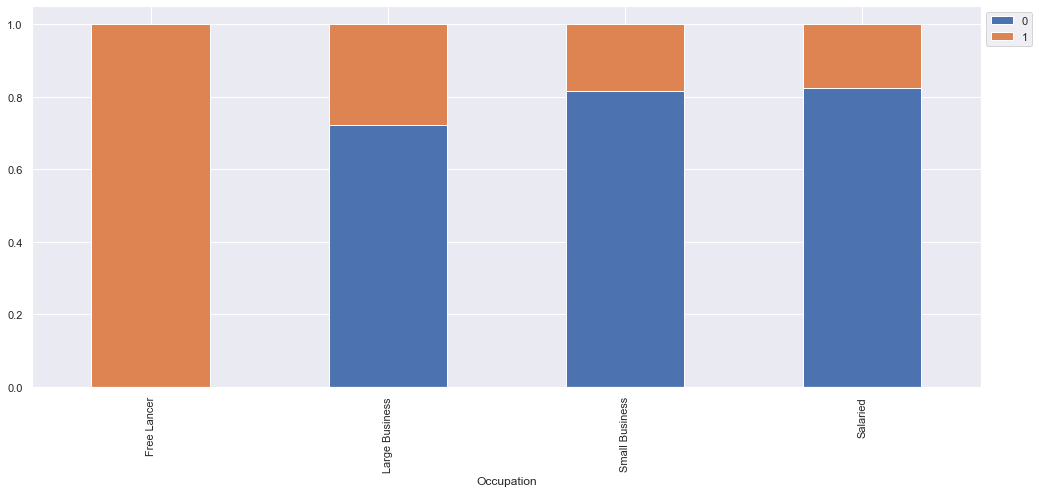

In [51]:
stacked_plot(data['Occupation'])

### ProdTaken vs Gender

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


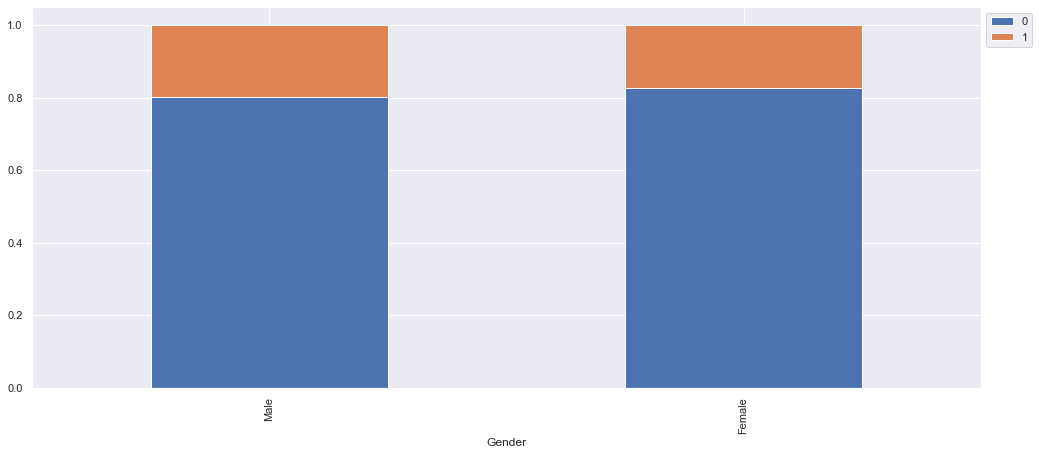

In [52]:
stacked_plot(data['Gender'])

### ProdTaken vs ProductPitched

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


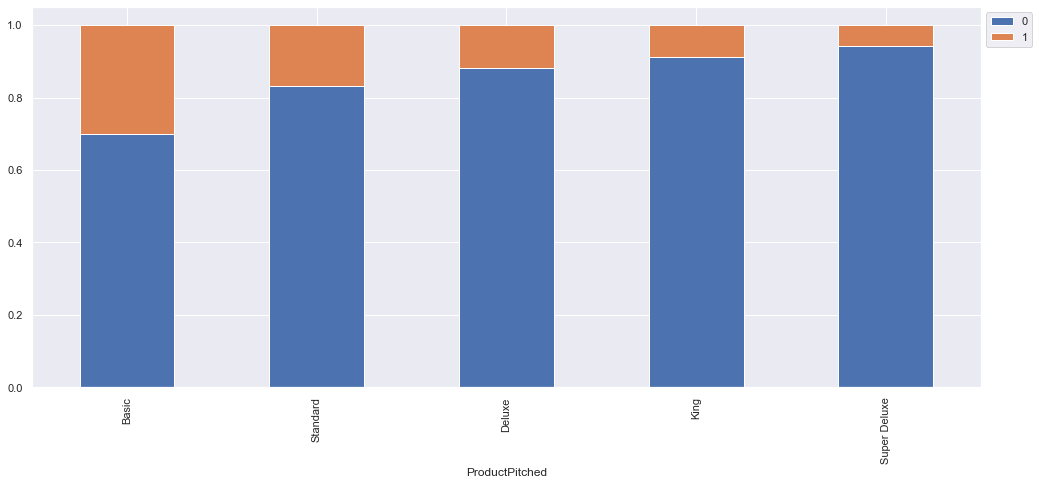

In [53]:
stacked_plot(data['ProductPitched'])

### ProdTaken vs PreferredPropertyStar

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


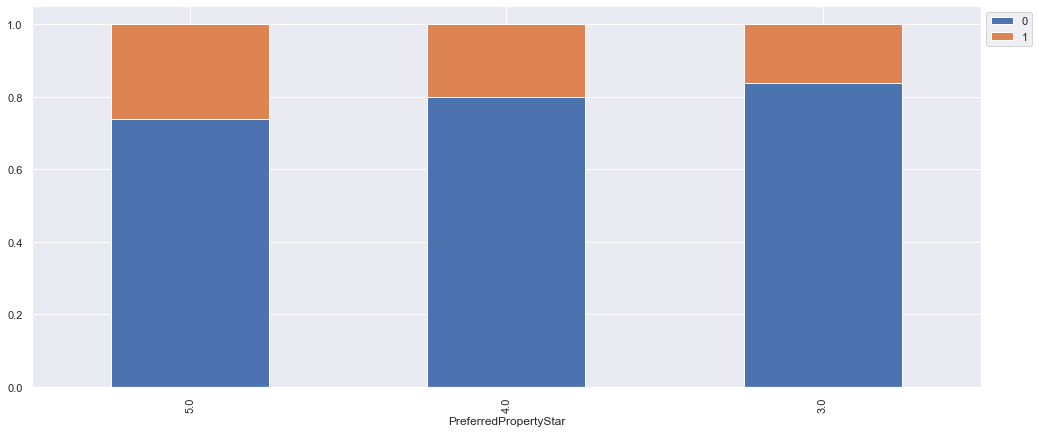

In [56]:
stacked_plot(data['PreferredPropertyStar'])

### ProdTaken vs MaritalStatus

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


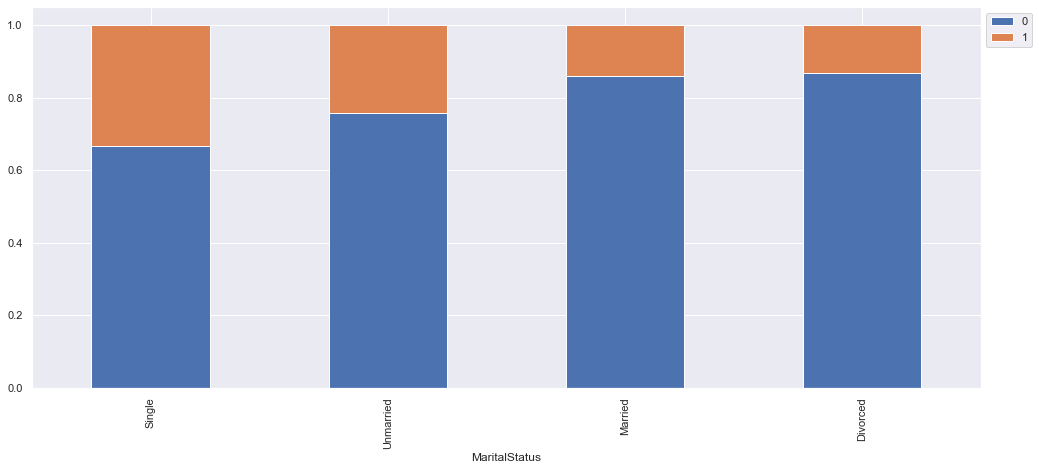

In [57]:
stacked_plot(data['MaritalStatus'])

### ProdTaken vs Passport

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


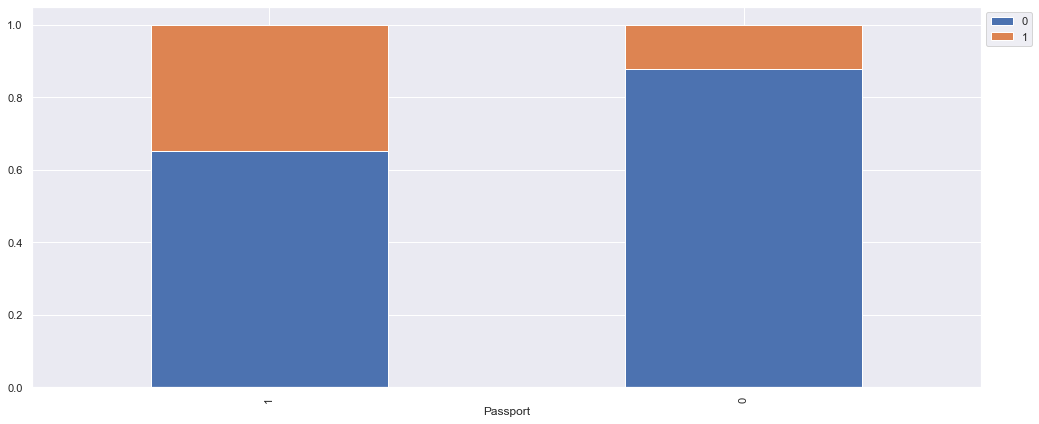

In [58]:
stacked_plot(data['Passport'])

### ProdTaken vs PitchSatisfactionScore

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


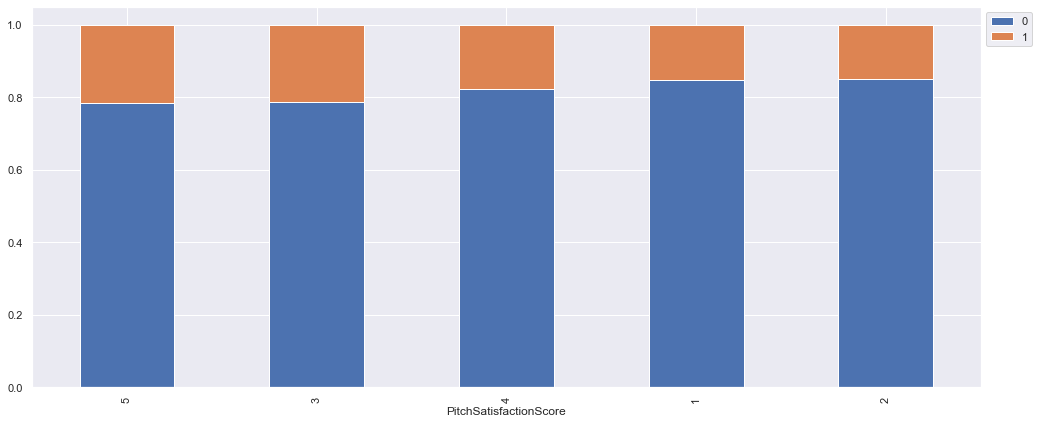

In [59]:
stacked_plot(data['PitchSatisfactionScore'])

### ProdTaken vs OwnCar

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


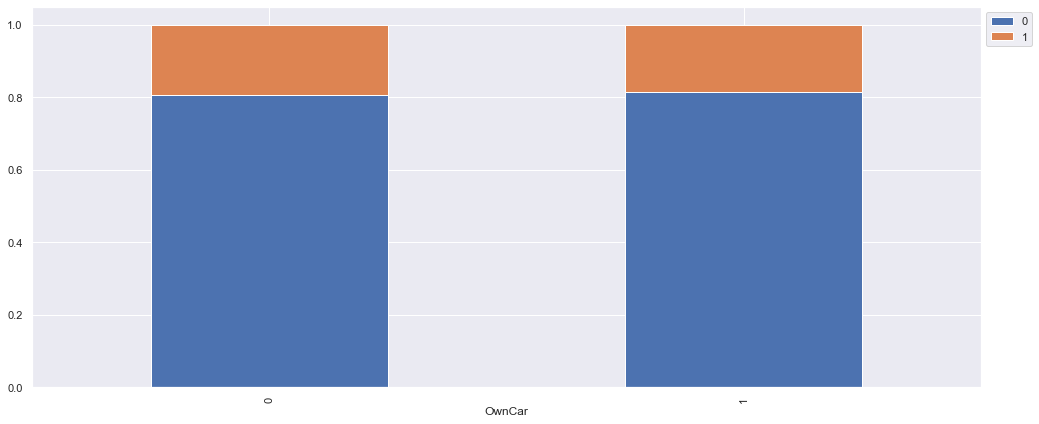

In [60]:
stacked_plot(data['OwnCar'])

### ProdTaken vs Designation

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


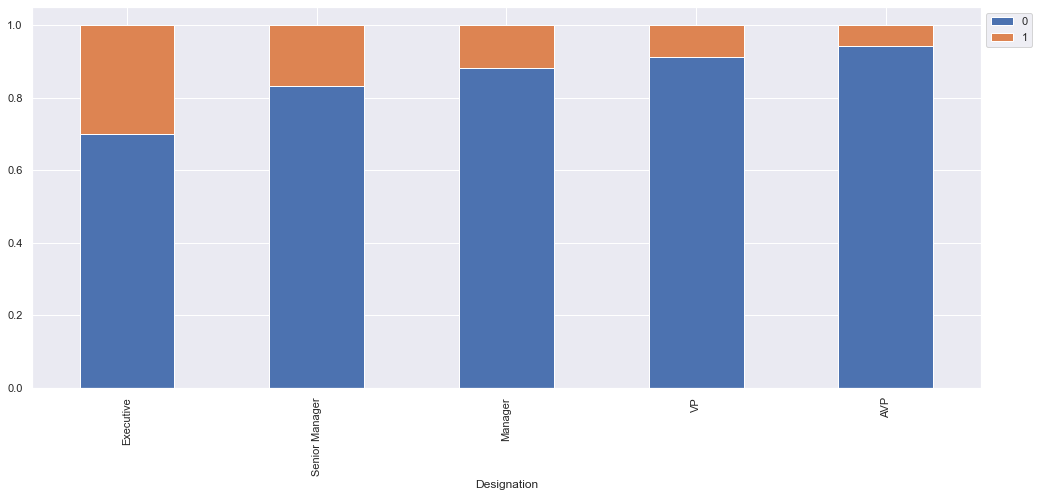

In [61]:
stacked_plot(data['Designation'])

* A lot of this data doesn't seem to show significant correlation however there are a few points the stand out.
* All the customers who are freelancers purchased a package.
* Customers who are single seemed to purchase a package more than their counterparts.
* Customers with a passport were slightly more likely to purchase a package.
* Customers with the 'Executive' designation were more likely to purchase a package.

In [65]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} of a customer who purchased a package',fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x} of a customer who purchased a package",fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t purchasing a package',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t purchasing a package - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

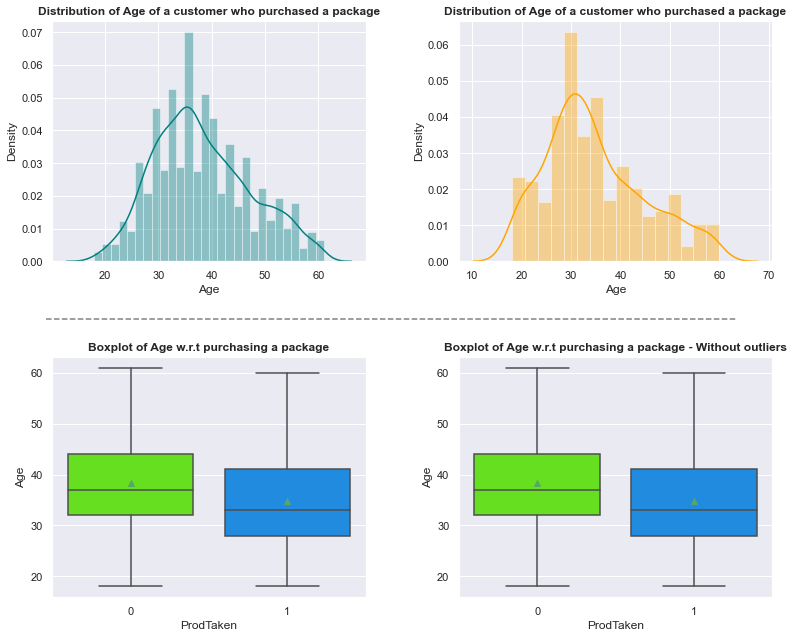

In [66]:
plot('Age')

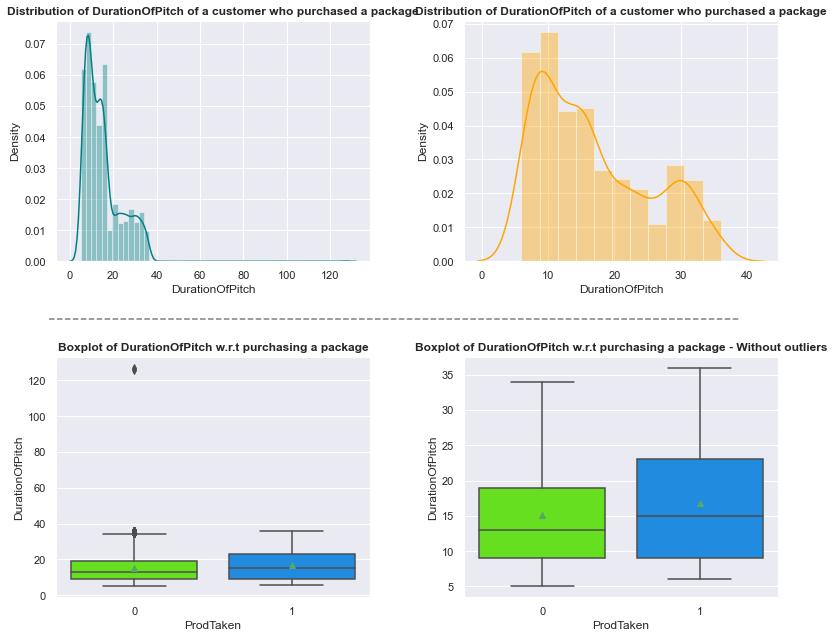

In [67]:
plot('DurationOfPitch')

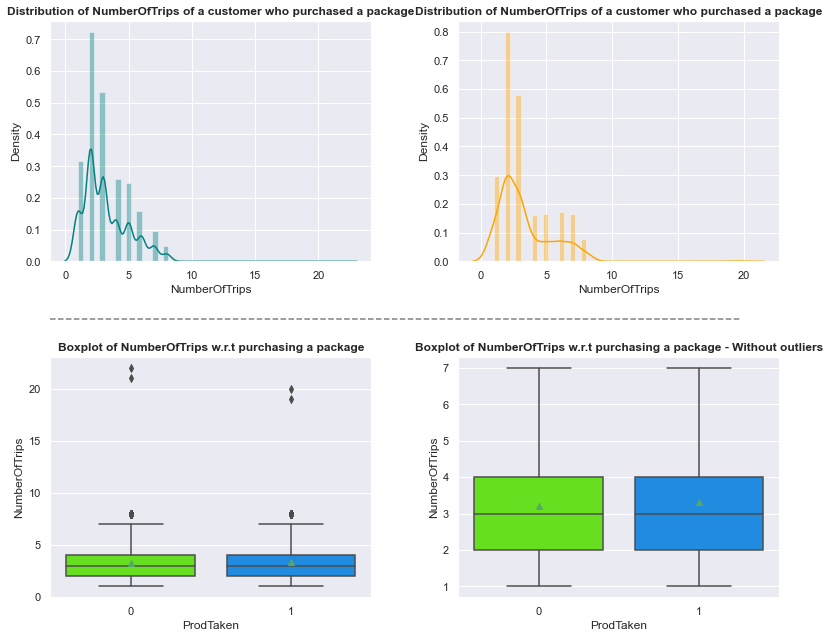

In [70]:
plot('NumberOfTrips')

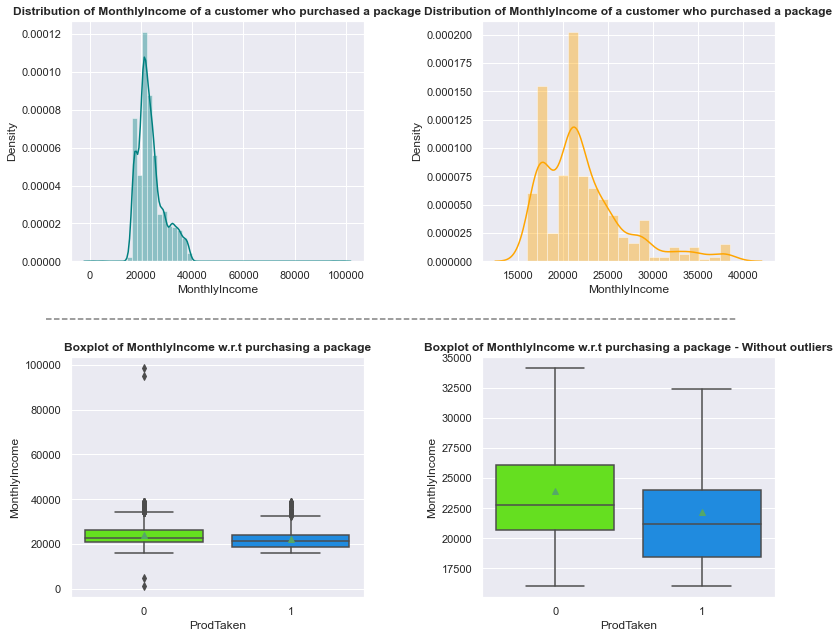

In [72]:
plot('MonthlyIncome')

* Customers making between 20,000 and 30,000 are looking like good canidates to market to.
* If I had to create a customer profile now, I'd say target single male customers with passports who are making between 20,000 and 30,000 dollars.

## Data Pre-processing

### Missing value treatment

In [77]:
data.isna().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

About 15% of the data has missing values, this isn't too high of a percentage therefore I'm comfortable simply dropping this data from the dataset.

In [78]:
data = data.dropna()

In [79]:
data.shape

(4128, 19)

### Outlier detection

In [80]:
Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [81]:
((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

Age                         0.000000
DurationOfPitch             0.024225
NumberOfPersonVisiting      0.072674
NumberOfFollowups           6.492248
NumberOfTrips               2.592054
NumberOfChildrenVisiting    0.000000
MonthlyIncome               5.402132
dtype: float64

There are quite a few outliers, however I'm deciding not to treat them as I've already removed data from the missing value treatment and realistically there will be outliers in other scenarios as well, so we might as well try to learn the patterns in the data with them.

### Feature Engineering

In [82]:
def split(*kwargs,columns=['TypeofContact','CityTier', 'Occupation','Gender','ProductPitched','PreferredPropertyStar',
                          'MaritalStatus', 'PitchSatisfactionScore','Designation']):
    '''
    Function to split data into X and Y then one hot encode the X variable.
    Returns training and test sets
    *kwargs : Variable to remove from the dataset before splitting into X and Y
    '''
    X = data.drop([*kwargs], axis=1)
    Y = data['ProdTaken']

    X = pd.get_dummies(X,columns=columns,drop_first=True)
    X = add_constant(X)

    #Splitting data in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)
    return X_train,X_test, y_train, y_test

In [85]:
X_train,X_test, y_train, y_test = split('ProdTaken')

## Model building - Bagging

The best metric to use for our model performance evaluation in this scenario is recall, since our biggest loss comes from not identifying a potential customer that will purchase a package. 

In [92]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [93]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Bagging Classifier

In [86]:
bag = BaggingClassifier(random_state=1)
bag.fit(X_train, y_train)

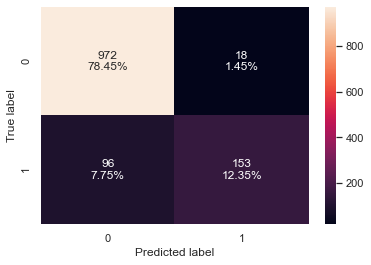

In [96]:
confusion_matrix_sklearn(bag, X_test, y_test)

In [155]:
bag_train_perf = model_performance_classification_sklearn(bag, X_train, y_train)
print('Training Performance: \n', bag_train_perf)

Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.994462  0.970803        1.0  0.985185


In [156]:
bag_test_perf = model_performance_classification_sklearn(bag, X_test, y_test)
print('Training Performance: \n', bag_test_perf)

Training Performance: 
    Accuracy    Recall  Precision        F1
0   0.90799  0.614458   0.894737  0.728571


* The Bagging Classifier is overfitting on the training data, in addition to this, it's doing poorly in terms of recall which is what we're most interested in. 

### Random Forest

In [88]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

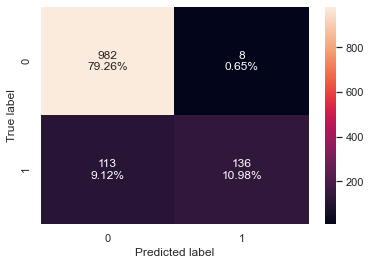

In [101]:
confusion_matrix_sklearn(rf, X_test, y_test)

In [157]:
rf_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
print('Training Performance: \n', rf_train_perf)

Training Performance: 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [159]:
rf_test_perf = model_performance_classification_sklearn(rf, X_test, y_test)
print('Training Performance: \n', rf_test_perf)

Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.902341  0.546185   0.944444  0.692112


* The Random Forest is overfitting on the training data and while the accuracy and percision are high on the test data, we're focusing on the recall which is very low.

### Decision Tree

In [90]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

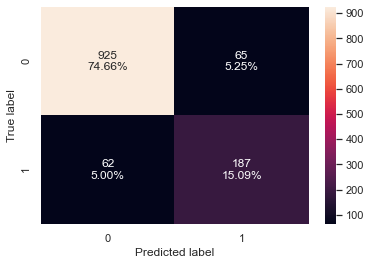

In [104]:
confusion_matrix_sklearn(dt, X_test, y_test)

In [158]:
dt_train_perf = model_performance_classification_sklearn(dt, X_train, y_train)
print('Training Performance: \n', dt_train_perf)

Training Performance: 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [160]:
dt_test_perf = model_performance_classification_sklearn(dt, X_test, y_test)
print('Training Performance: \n', dt_test_perf)

Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.897498  0.751004   0.742063  0.746507


* The decision tree can't generalize well on the test data and like before with the other models, the recall is very low.

## Model performance improvement - Bagging

To avoid missing out on possible sales, I'll tune the models to increase recall. 

### Tuning Bagging Classifier

In [123]:
# grid search for bagging classifier
dt1 = DecisionTreeClassifier(class_weight={0:0.17,1:0.83},random_state=1)
param_grid = {'base_estimator':[dt1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.17,
                                                                                 1: 0.83},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [124]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  max_features=1, n_estimators=15, random_state=1)

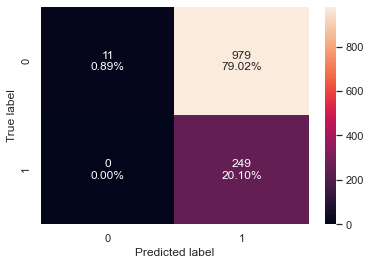

In [125]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [161]:
bag_tuned_train_perf = model_performance_classification_sklearn(bagging_estimator, X_train, y_train)
print('Training Performance: \n', bag_tuned_train_perf)

Training Performance: 
    Accuracy  Recall  Precision        F1
0  0.196262     1.0   0.190941  0.320655


In [162]:
bag_tuned_test_perf = model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print('Training Performance: \n', bag_tuned_test_perf)

Training Performance: 
    Accuracy  Recall  Precision       F1
0  0.209847     1.0   0.202769  0.33717


* The recall is higher, however the accuracy and precision dropped extremely low which is not a good sign. This model is making a lot of mistakes.

### Tuning Random Forest

In [129]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [5,7,15,51,101],
        "min_samples_leaf": np.arange(1, 9,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.7, n_estimators=101, random_state=1)

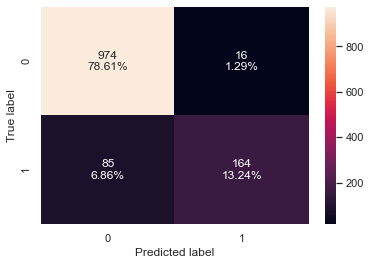

In [130]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [163]:
rf_tuned_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
print('Training Performance: \n', rf_tuned_train_perf)

Training Performance: 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [164]:
rf_tuned_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print('Training Performance: \n', rf_tuned_test_perf)

Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.918483  0.658635   0.911111  0.764569


* After tuning the Random Forest, the results are still very similar to the untuned model from earlier, so not great.

### Tuning Decision Tree

In [183]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

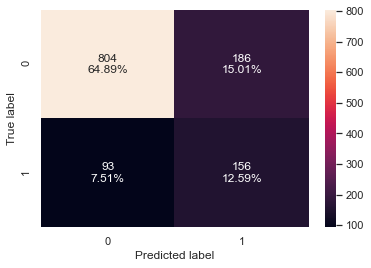

In [138]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [165]:
dt_tuned_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
print('Training Performance: \n', dt_tuned_train_perf)

Training Performance: 
    Accuracy    Recall  Precision       F1
0  0.795431  0.702555   0.473555  0.56576


In [166]:
dt_tuned_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print('Training Performance: \n', dt_tuned_test_perf)

Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.774818  0.626506    0.45614  0.527919


* Tuning the decision tree actually led to a worse result in this case, lowering all of the metrics

## Model building - Boosting

### Adaboost

In [141]:
ab_cls=AdaBoostClassifier(random_state=1)
ab_cls.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

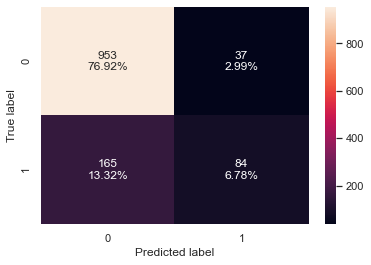

In [142]:
confusion_matrix_sklearn(ab_cls, X_test,y_test)

In [171]:
ab_train_perf = model_performance_classification_sklearn(ab_cls, X_train, y_train)
print('Training Performance: \n', ab_train_perf)

Training Performance: 
    Accuracy    Recall  Precision       F1
0  0.847698  0.337591   0.706107  0.45679


In [172]:
ab_test_perf = model_performance_classification_sklearn(ab_cls, X_test, y_test)
print('Training Performance: \n', ab_test_perf)

Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.836965  0.337349   0.694215  0.454054


### Tuning Adaboost

In [182]:
# Choose the type of classifier. 
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=60, random_state=1)

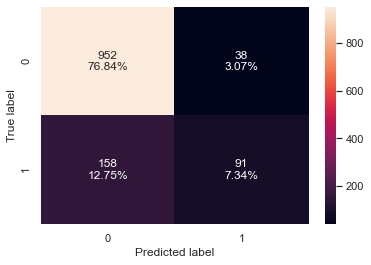

In [181]:
confusion_matrix_sklearn(ab_tuned, X_test,y_test)

In [178]:
ab_tuned_train_perf = model_performance_classification_sklearn(ab_tuned, X_train, y_train)
print('Training Performance: \n', ab_tuned_train_perf)

Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.849775  0.350365   0.711111  0.469438


In [179]:
ab_tuned_test_perf = model_performance_classification_sklearn(ab_tuned, X_test, y_test)
print('Training Performance: \n', ab_tuned_test_perf)

Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.841808  0.365462   0.705426  0.481481


### GradientBoost

In [146]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

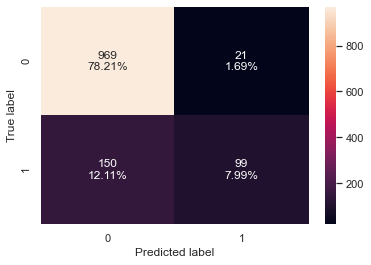

In [147]:
confusion_matrix_sklearn(gb_estimator, X_test,y_test)

In [173]:
gb_train_perf = model_performance_classification_sklearn(gb_estimator, X_train, y_train)
print('Training Performance: \n', gb_train_perf)

Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.900658  0.529197   0.909091  0.668973


In [174]:
gb_test_perf = model_performance_classification_sklearn(gb_estimator, X_test, y_test)
print('Training Performance: \n', gb_test_perf)

Training Performance: 
    Accuracy   Recall  Precision        F1
0  0.861985  0.39759      0.825  0.536585


### Tuning GradientBoost

In [186]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7]
              }

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, max_features=0.8, n_estimators=90,
                           random_state=1, subsample=0.9)

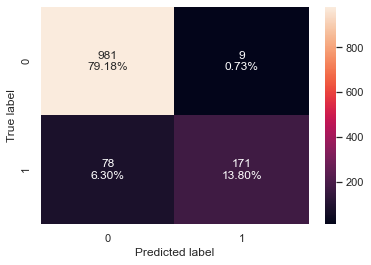

In [187]:
confusion_matrix_sklearn(gb_tuned, X_test,y_test)

In [188]:
gb_tuned_train_perf = model_performance_classification_sklearn(gb_tuned, X_train, y_train)
print('Training Performance: \n', gb_tuned_train_perf)

Training Performance: 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [189]:
gb_tuned_test_perf = model_performance_classification_sklearn(gb_tuned, X_test, y_test)
print('Training Performance: \n', gb_tuned_test_perf)

Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.929782  0.686747       0.95  0.797203


### XGBoost

Due to complexity issues, I won't be using XGBoost in this assignment.

### Stacking Classifiers

In [286]:
estimators=[('Gradient Boost', gb_tuned), ("Ada Boost", ab_tuned),
           ('Random Forest', rf_estimator), ('Bagging Classifier', bagging_estimator), ('Decision Tree', dt)]
final_estimator=GradientBoostingClassifier(random_state=1)

In [287]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Gradient Boost',
                                GradientBoostingClassifier(max_depth=7,
                                                           max_features=0.8,
                                                           n_estimators=90,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Ada Boost',
                                AdaBoostClassifier(learning_rate=1,
                                                   n_estimators=60,
                                                   random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features=0.7,
                                                       n_estimators=101,
                                                       random_state=1)),
                               

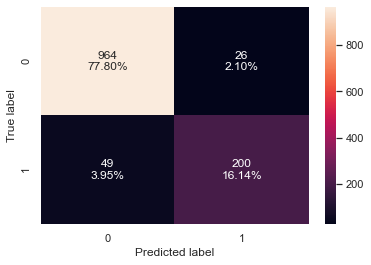

In [288]:
confusion_matrix_sklearn(stacking_estimator, X_test,y_test)

In [289]:
sc_train_perf = model_performance_classification_sklearn(stacking_estimator, X_train, y_train)
print('Training Performance: \n', sc_train_perf)

Training Performance: 
    Accuracy  Recall  Precision        F1
0  0.999308     1.0   0.996364  0.998179


In [290]:
sc_test_perf = model_performance_classification_sklearn(stacking_estimator, X_test, y_test)
print('Training Performance: \n', sc_test_perf)

Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.939467  0.803213   0.884956  0.842105


### Compare all the models

In [292]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dt_train_perf.T,dt_tuned_train_perf.T, bag_train_perf.T,
     bag_tuned_train_perf.T, rf_train_perf.T, rf_tuned_train_perf.T,
     ab_train_perf.T, ab_tuned_train_perf.T, gb_train_perf.T,
     gb_tuned_train_perf.T, sc_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Tuned",
    "Random Forest Classifier",
    "Random Forest Tuned",
    "Adaboost",
    "Adaboost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "Stacking Classifier"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Tuned,Random Forest Classifier,Random Forest Tuned,Adaboost,Adaboost Tuned,Gradient Boost,Gradient Boost Tuned,Stacking Classifier
Accuracy,1.0,0.795431,0.994462,0.196262,1.0,1.0,0.847698,0.849775,0.900658,1.0,0.999308
Recall,1.0,0.702555,0.970803,1.000000,1.0,1.0,0.337591,0.350365,0.529197,1.0,1.000000
Precision,1.0,0.473555,1.000000,0.190941,1.0,1.0,0.706107,0.711111,0.909091,1.0,0.996364
F1,1.0,0.565760,0.985185,0.320655,1.0,1.0,0.456790,0.469438,0.668973,1.0,0.998179


In [294]:
# test performance comparison

models_test_comp_df = pd.concat(
    [dt_test_perf.T,dt_tuned_test_perf.T, bag_test_perf.T,
     bag_tuned_test_perf.T, rf_test_perf.T, rf_tuned_test_perf.T,
     ab_test_perf.T, ab_tuned_test_perf.T, gb_test_perf.T,
     gb_tuned_test_perf.T, sc_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Tuned",
    "Random Forest Classifier",
    "Random Forest Tuned",
    "Adaboost",
    "Adaboost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "Stacking Classifier"
]
print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Tuned,Random Forest Classifier,Random Forest Tuned,Adaboost,Adaboost Tuned,Gradient Boost,Gradient Boost Tuned,Stacking Classifier
Accuracy,0.897498,0.774818,0.907990,0.209847,0.902341,0.918483,0.836965,0.841808,0.861985,0.929782,0.939467
Recall,0.751004,0.626506,0.614458,1.000000,0.546185,0.658635,0.337349,0.365462,0.397590,0.686747,0.803213
Precision,0.742063,0.456140,0.894737,0.202769,0.944444,0.911111,0.694215,0.705426,0.825000,0.950000,0.884956
F1,0.746507,0.527919,0.728571,0.337170,0.692112,0.764569,0.454054,0.481481,0.536585,0.797203,0.842105


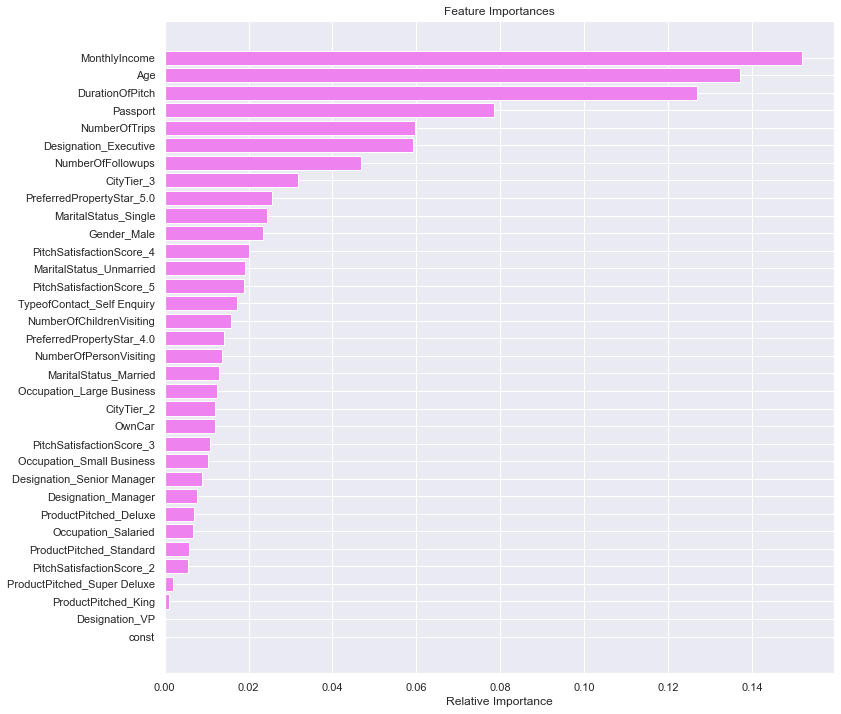

In [296]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Insights & Recommendations

* I would recommend primarily targeting customers who are making a salary of between 20,000 and 30,000 dollars and who are in the age range of 30-40 year olds.
* Another relevant factor is the length of the pitch, pitches between 5 to 20 minutes long seem to be the sweet spot. I would recommend telling the sales people to try and keep all their pitches in this timeframe.
* In addition to the variables mentioned above, I'd also recommend targeting customers who own a passport already. These customers must travel often, maybe offering a sort of discount after x number of trips would be a good incentive to get them to buy a travel package again.